In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (
    f1_score, 
    precision_score, 
    accuracy_score, 
    recall_score, 
    balanced_accuracy_score, 
    confusion_matrix, 
    classification_report
)

In [2]:
df = pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.describe().T.style.background_gradient(cmap = sns.color_palette("ch:s=-2, r=0.6", as_cmap = True))

,count,mean,std,min,25%,50%,75%,max
id,569.000000,30371831.432337,125020585.612224,8670.000000,869218.000000,906024.000000,8813129.000000,911320502.000000
radius_mean,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
texture_mean,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
perimeter_mean,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000
area_mean,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000
smoothness_mean,569.000000,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400
compactness_mean,569.000000,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400
concavity_mean,569.000000,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800
concave points_mean,569.000000,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200
symmetry_mean,569.000000,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.304000


In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
def plot_sns_countplot(df, column_name):
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=column_name, palette='pastel', edgecolor=".6", order=df[column_name].value_counts().index)
    
    plt.title(f'Categorical Countplot - {column_name}', fontsize=16)
    plt.xlabel(column_name, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.show()

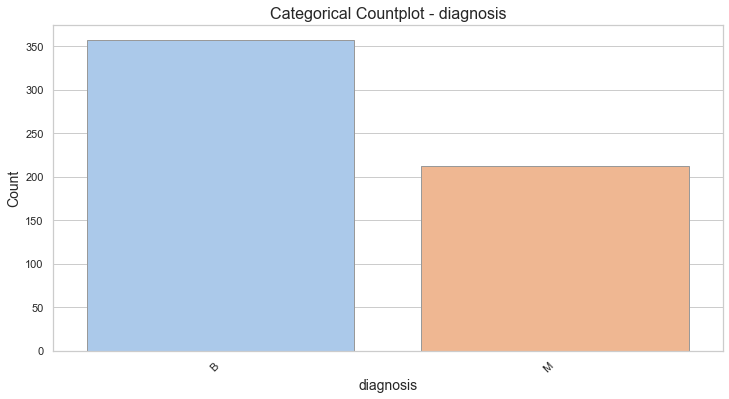

In [7]:
plot_sns_countplot(df, "diagnosis")

In [8]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    #print(f"histogram and boxplot of {feature}")
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [11]:
df.drop(['id'], axis = 1,  inplace = True)

<ipython-input-10-c149043db2ba>:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f2, (ax_box2, ax_hist2) = plt.subplots(


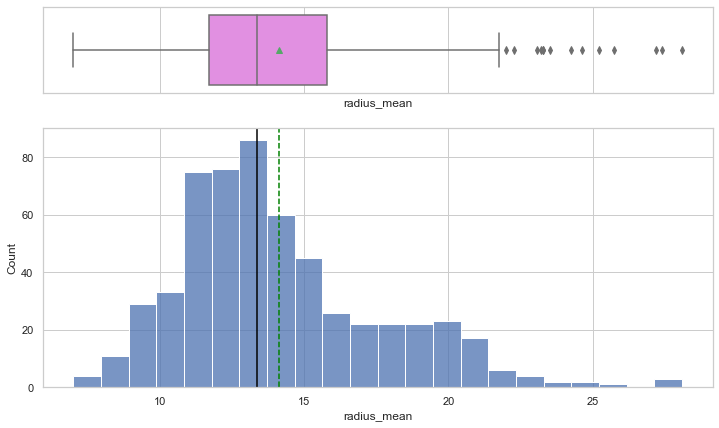

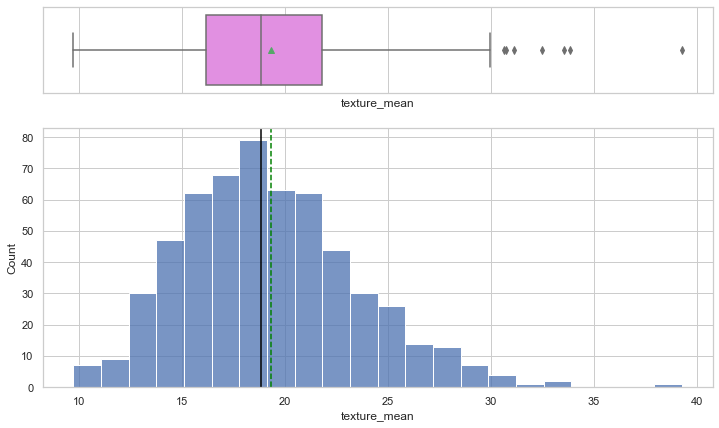

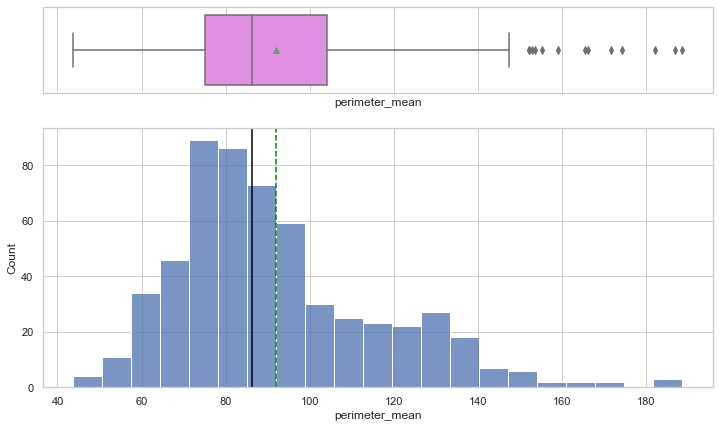

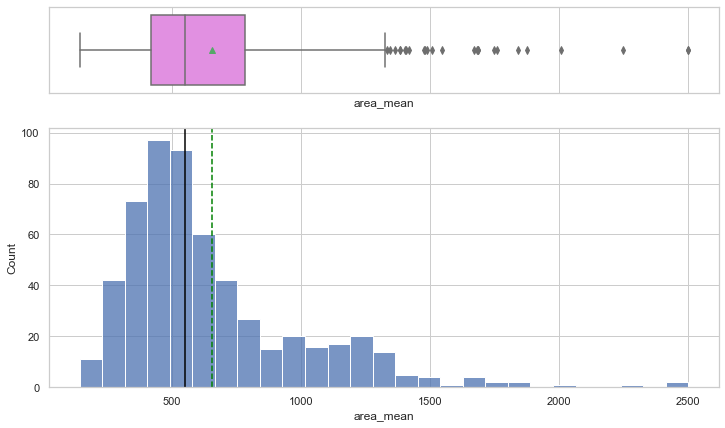

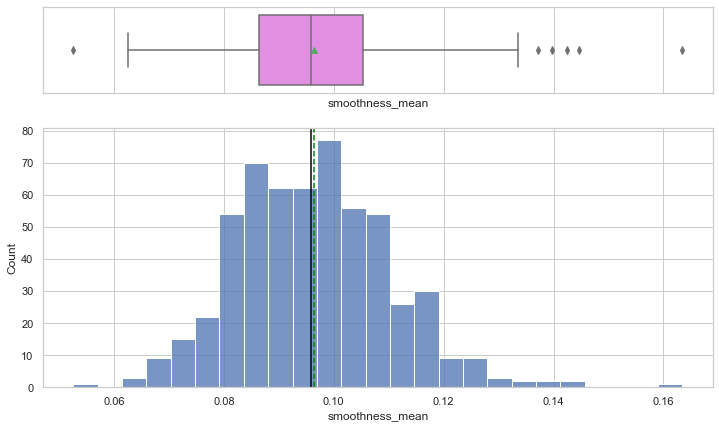

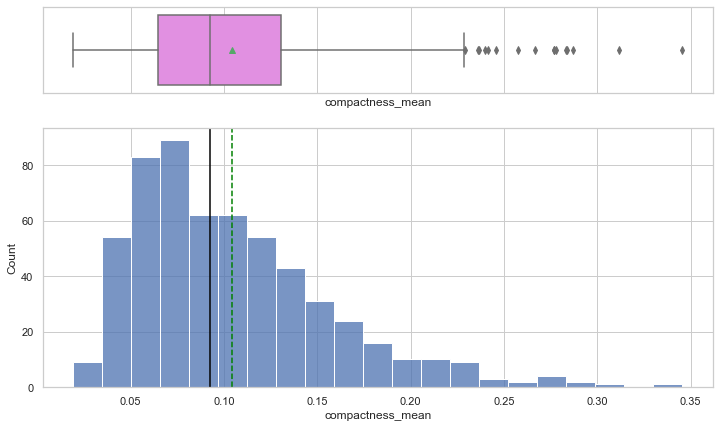

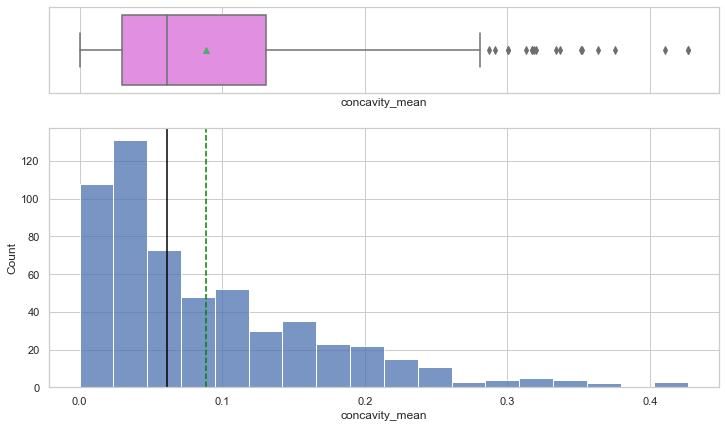

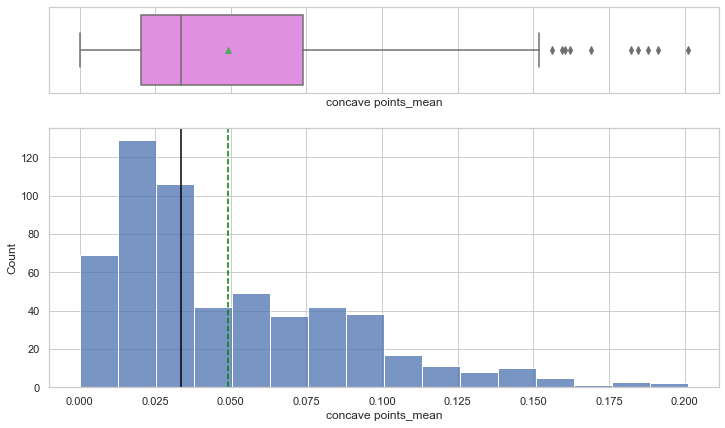

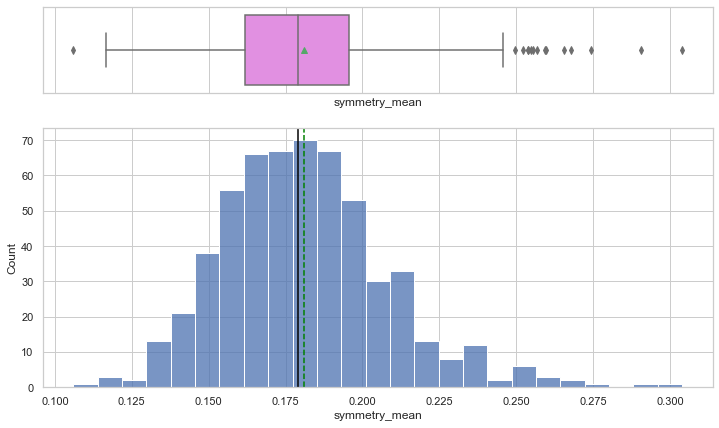

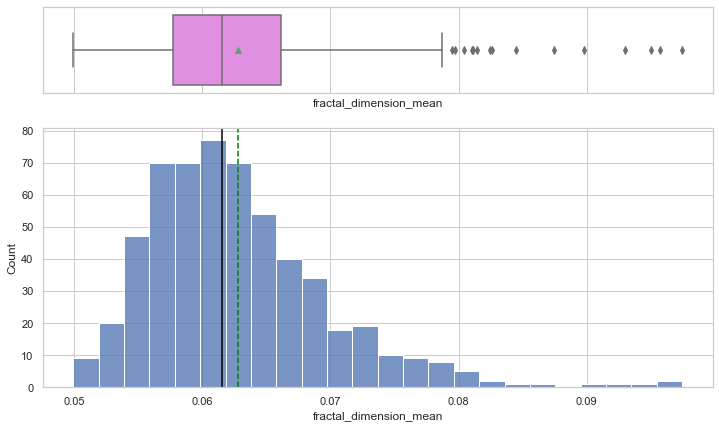

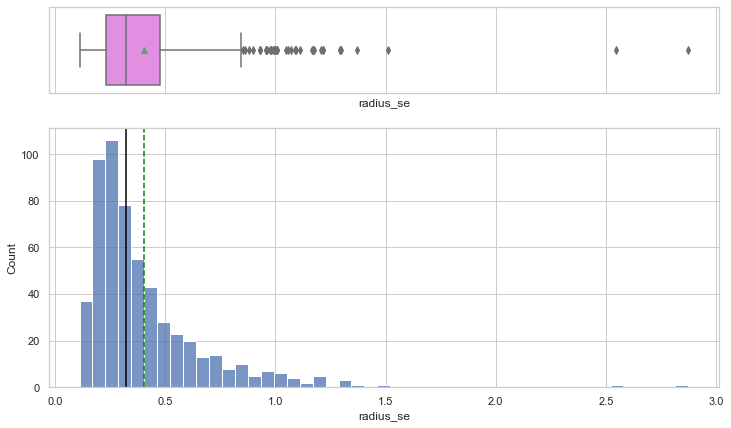

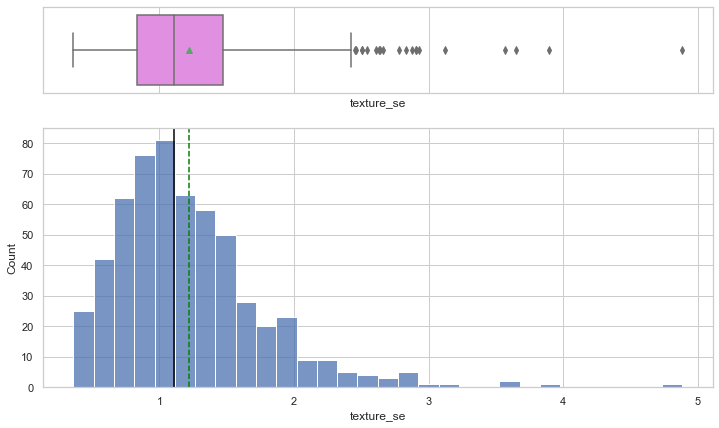

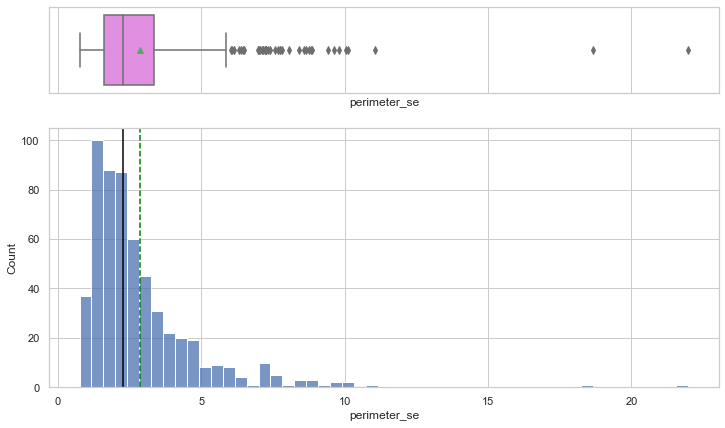

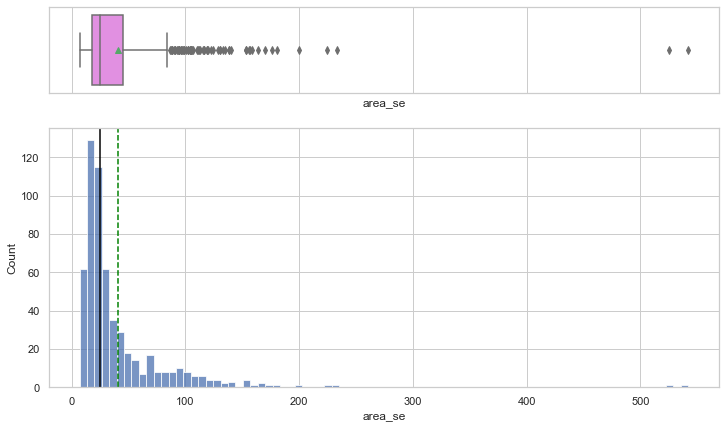

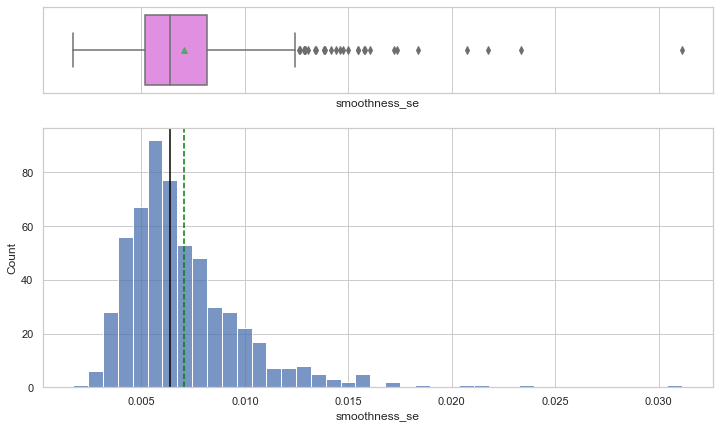

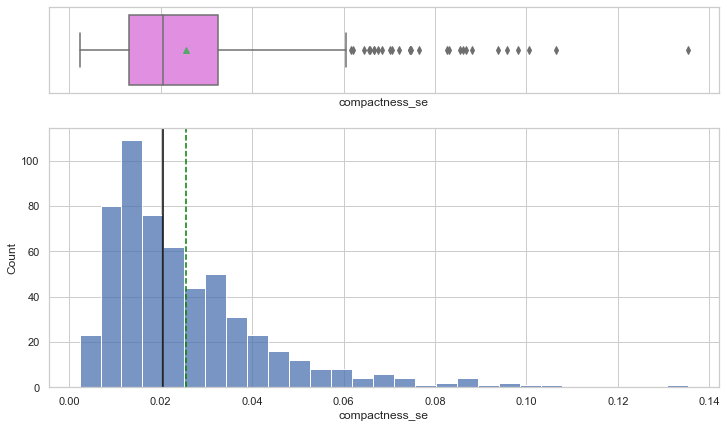

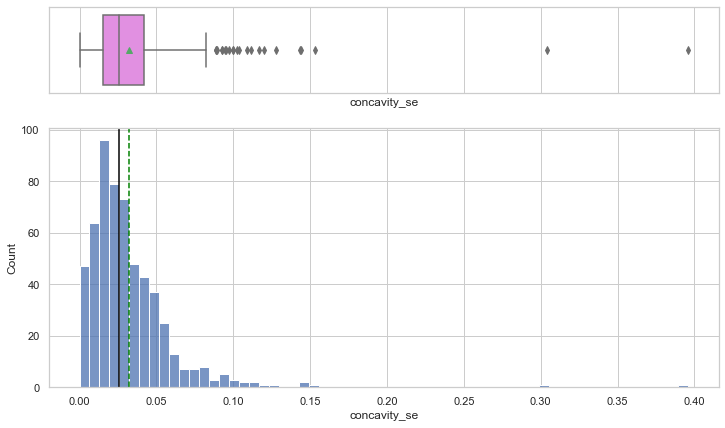

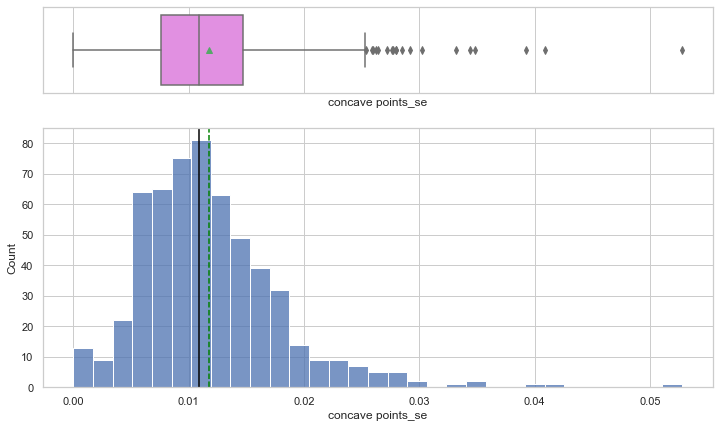

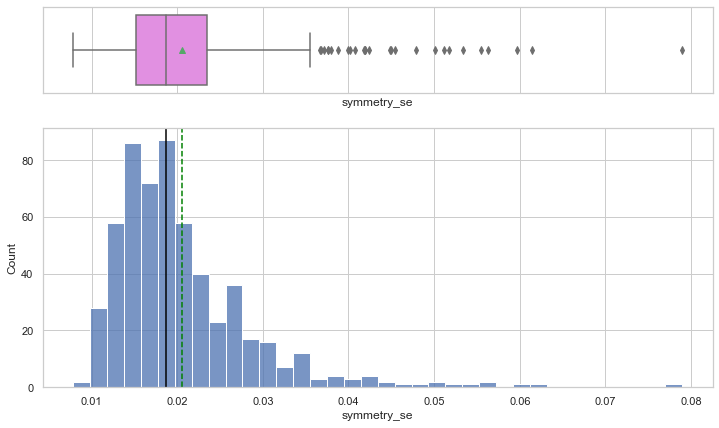

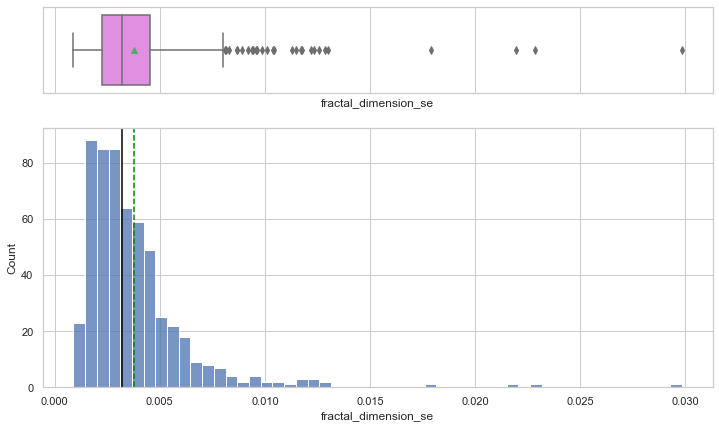

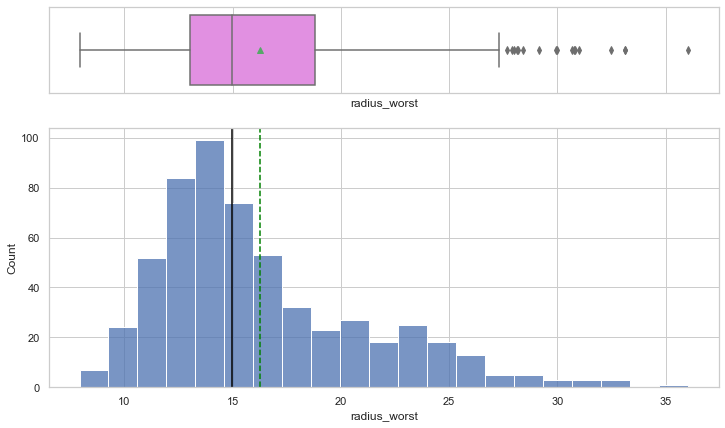

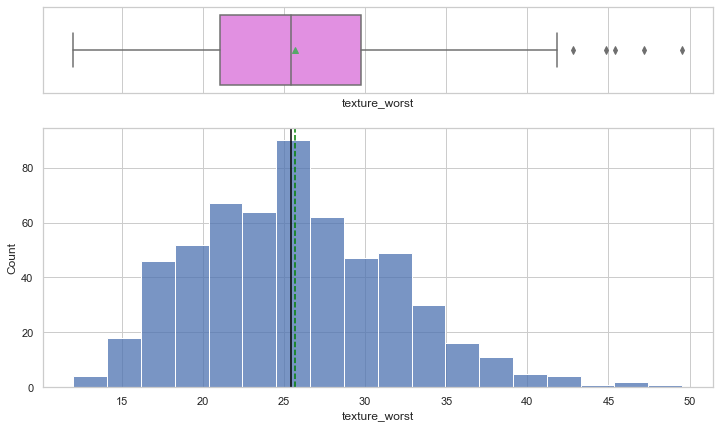

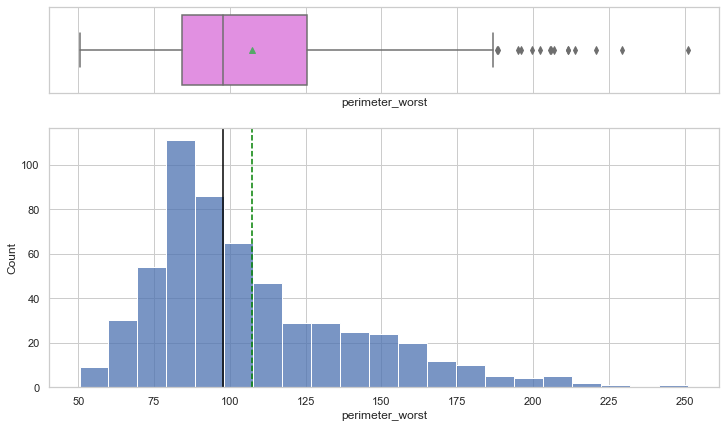

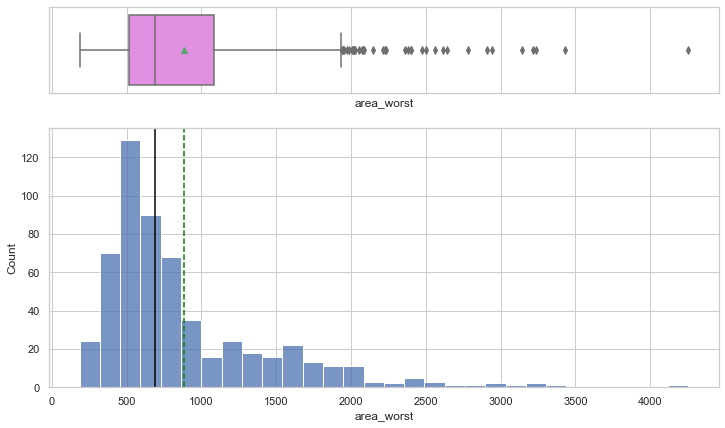

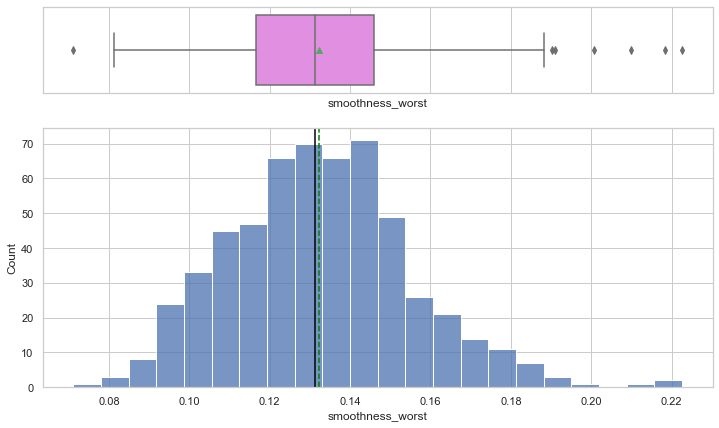

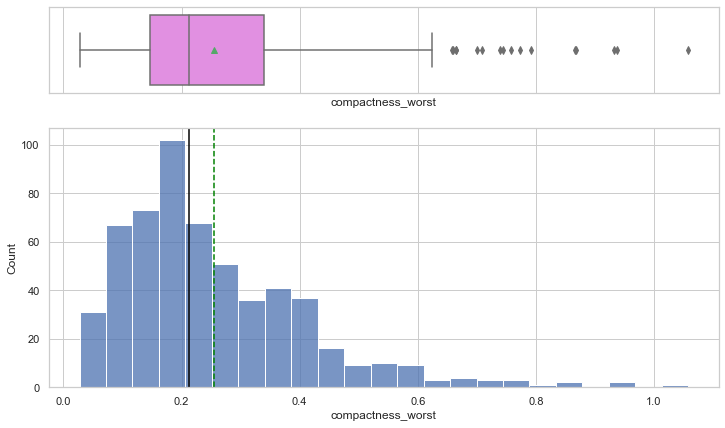

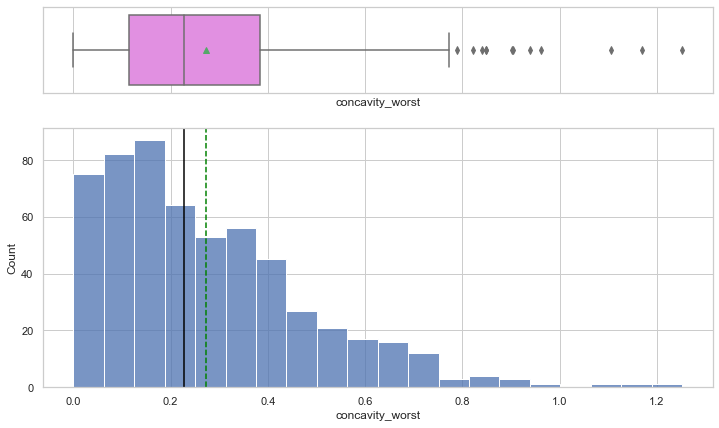

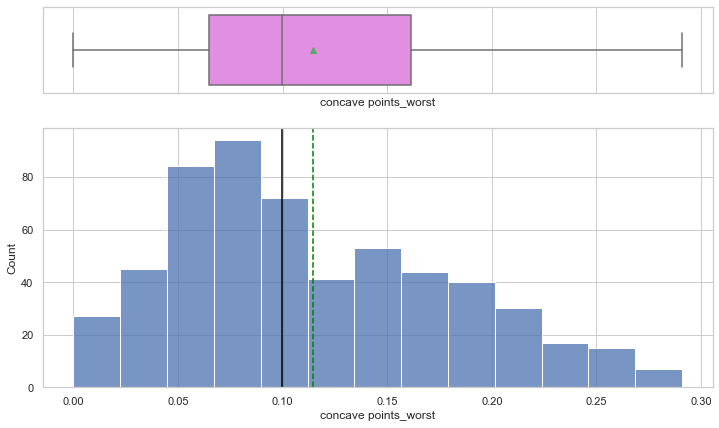

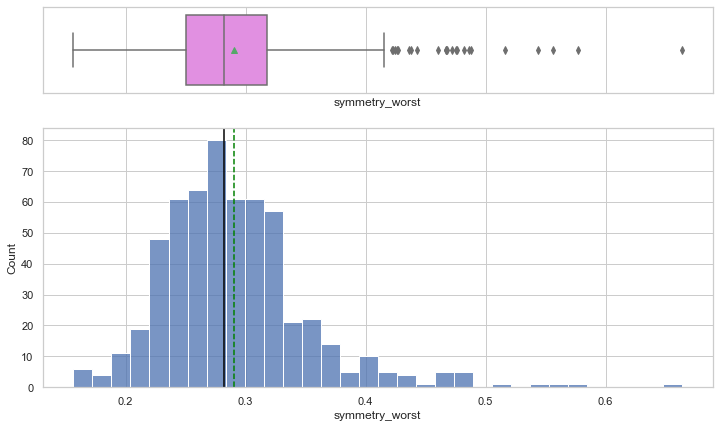

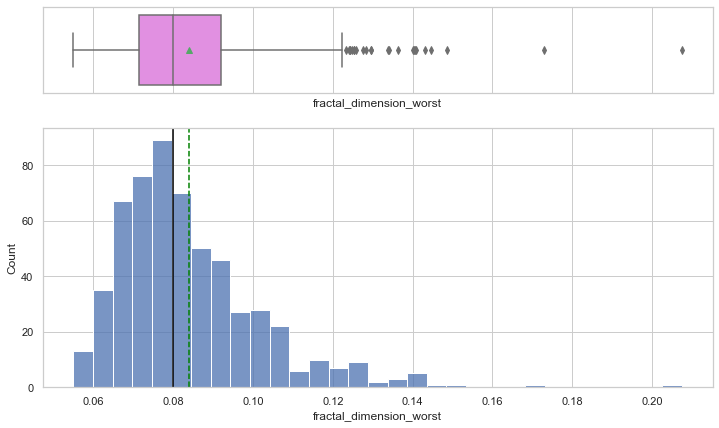

In [12]:
for column in df.columns:
    if column != 'diagnosis':
        histogram_boxplot(df, column)

In [13]:
def scatter_plot(data, x_variable, y_variable):
    """
    Print the scatter plot

    data: dataframe
    x_variable: independent variable for x-axis
    y_variable: dependent variable for y-axis
    """
    plt.scatter(data[x_variable], data[y_variable])
    plt.title(f"Scatter Plot of {y_variable} vs {x_variable}")
    plt.xlabel(x_variable)
    plt.ylabel(y_variable)
    plt.show()

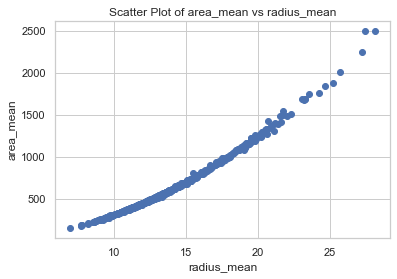

In [14]:
scatter_plot(df, 'radius_mean', 'area_mean')

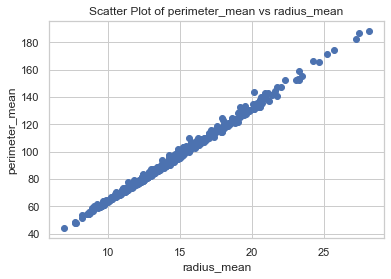

In [15]:
scatter_plot(df, 'radius_mean', 'perimeter_mean')

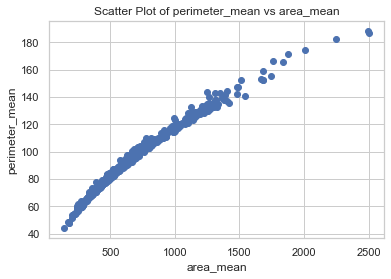

In [16]:
scatter_plot(df, 'area_mean', 'perimeter_mean')

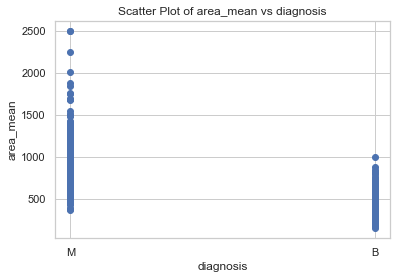

In [17]:
scatter_plot(df, 'diagnosis', 'area_mean')

In [18]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

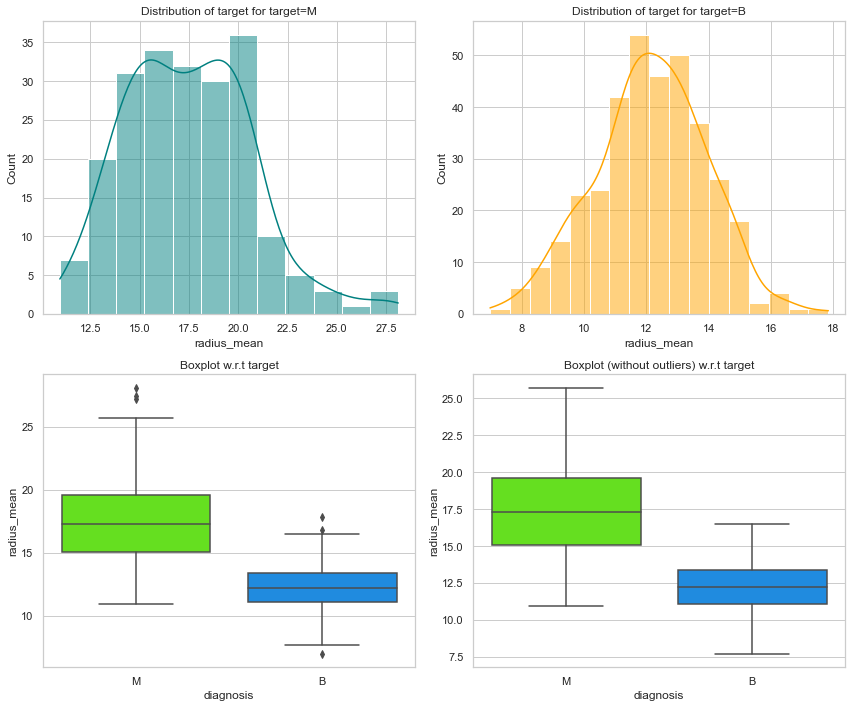

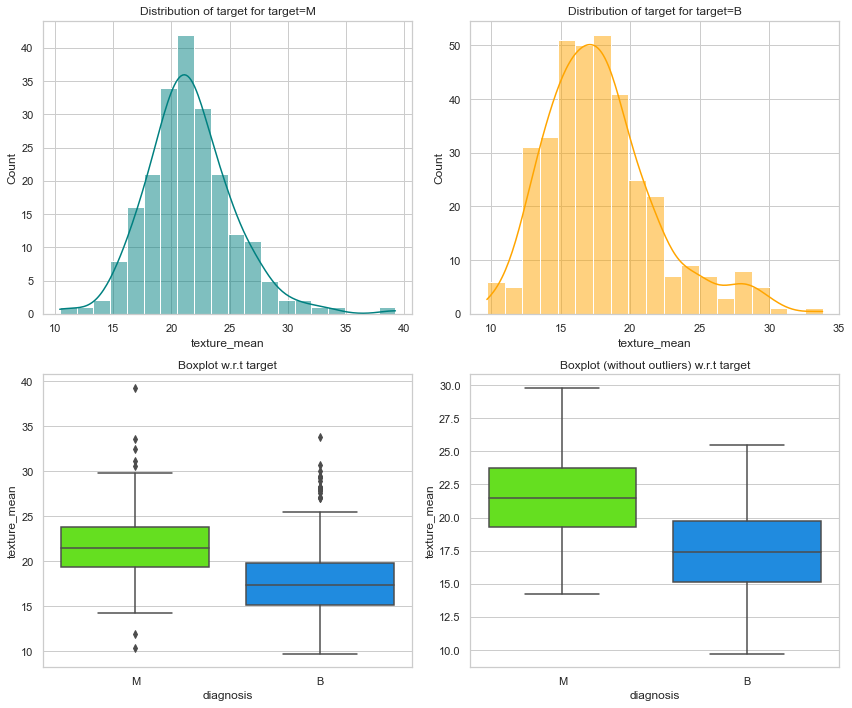

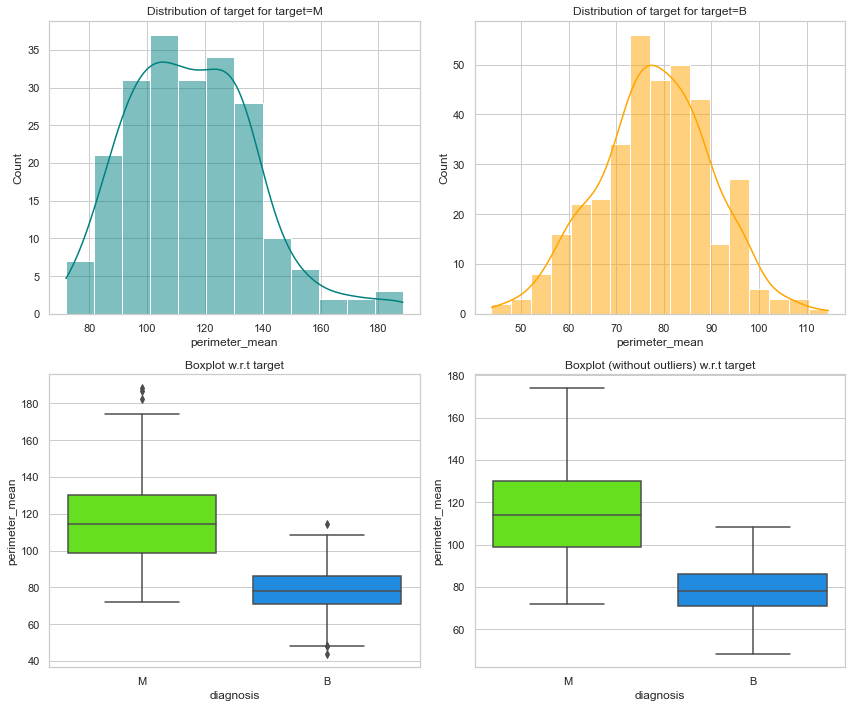

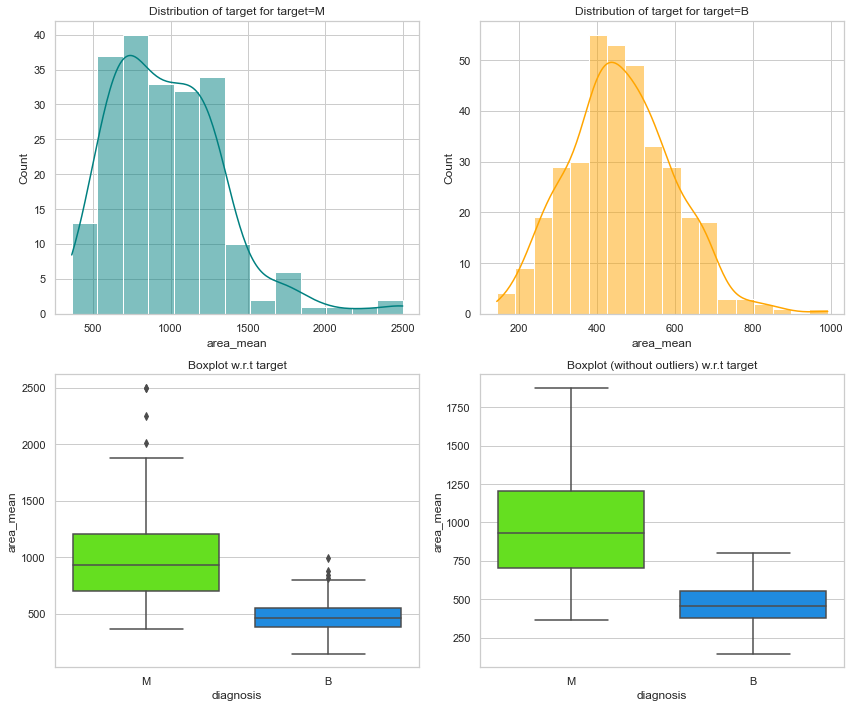

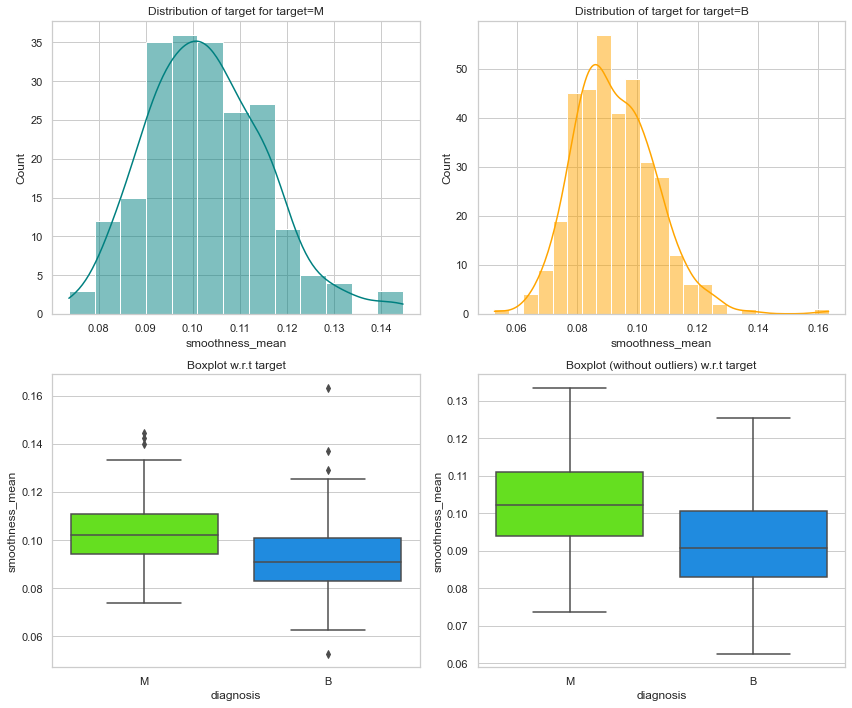

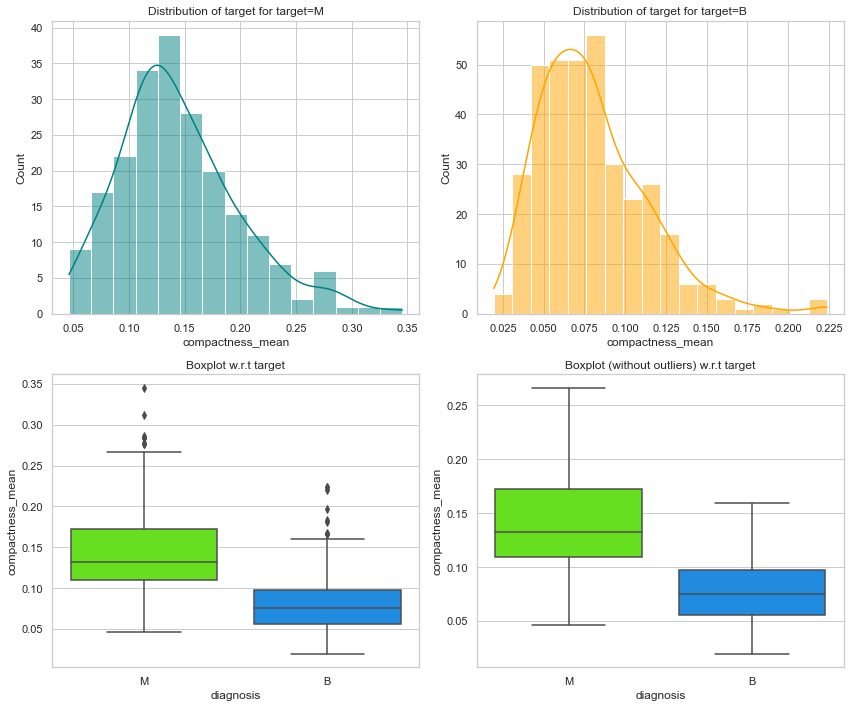

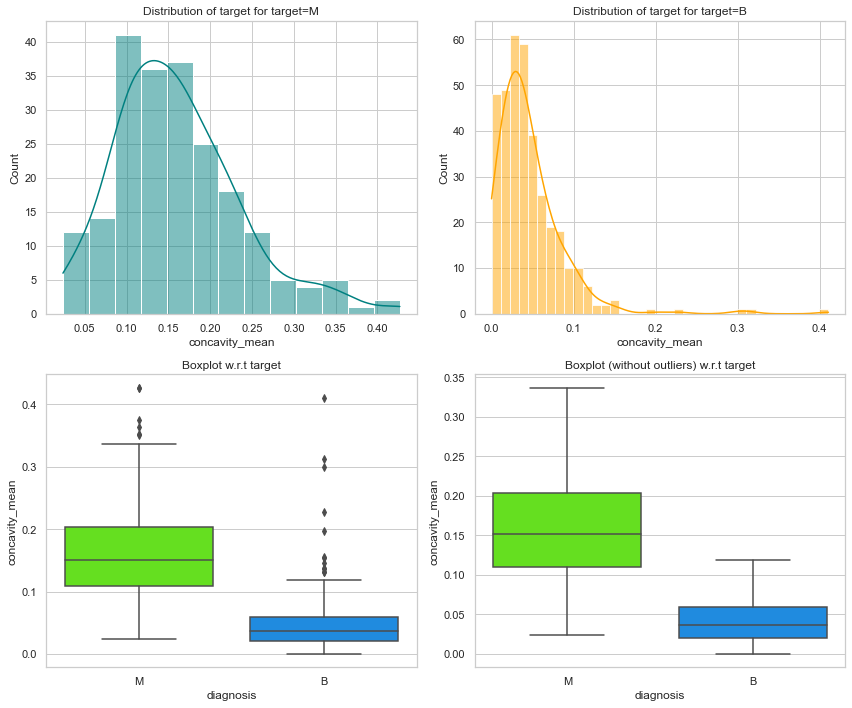

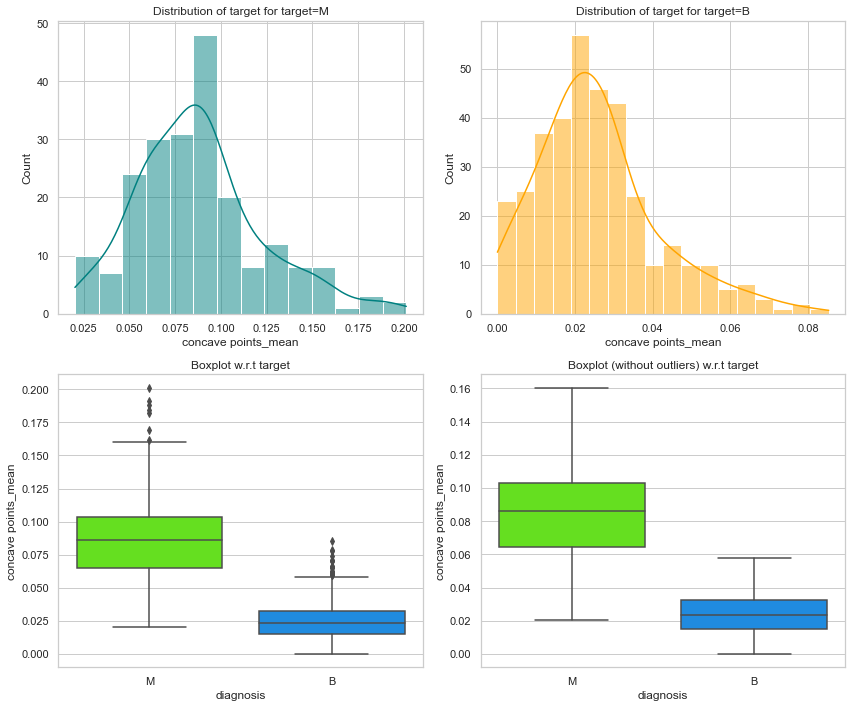

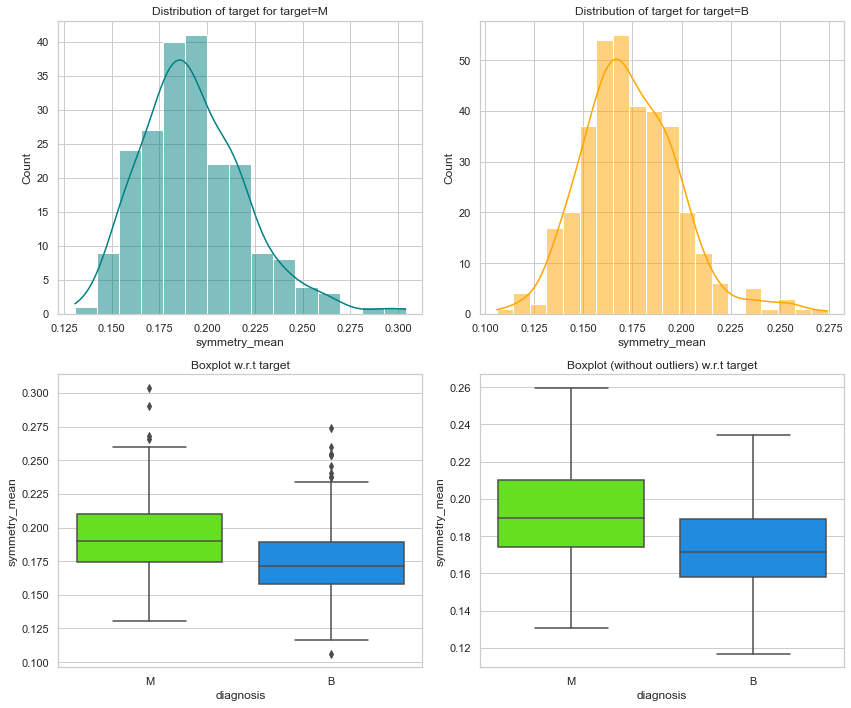

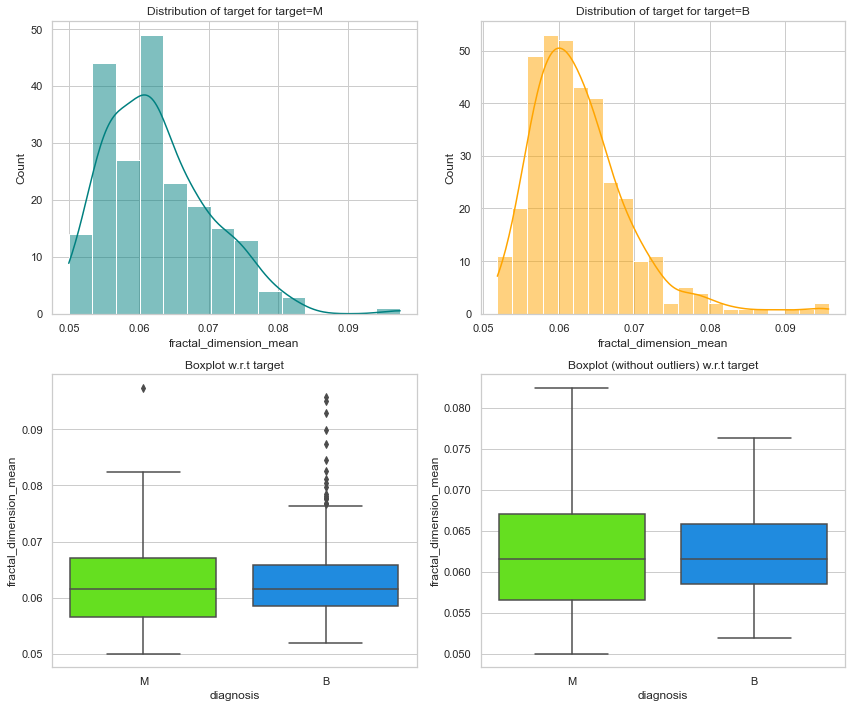

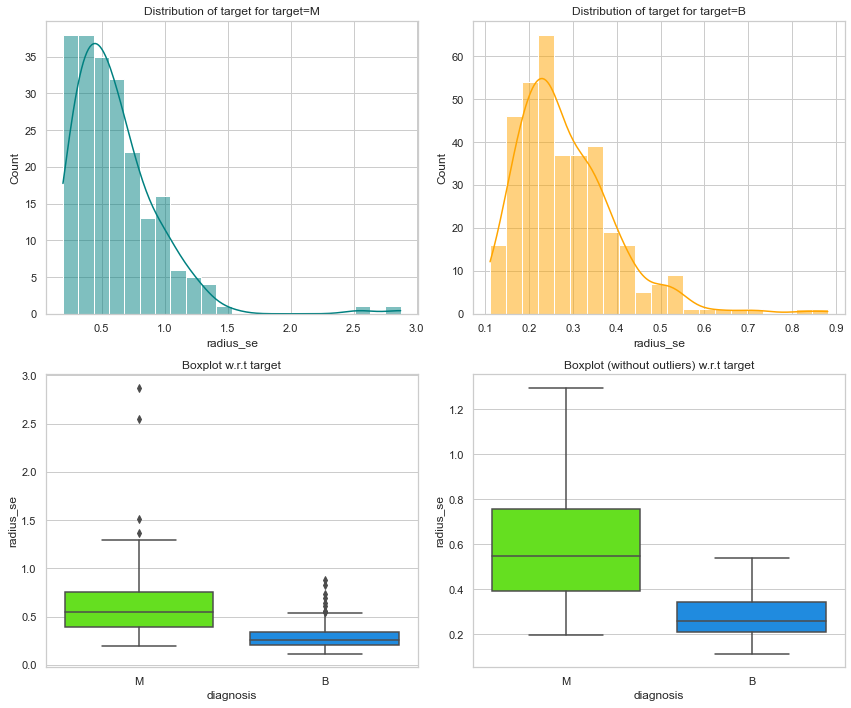

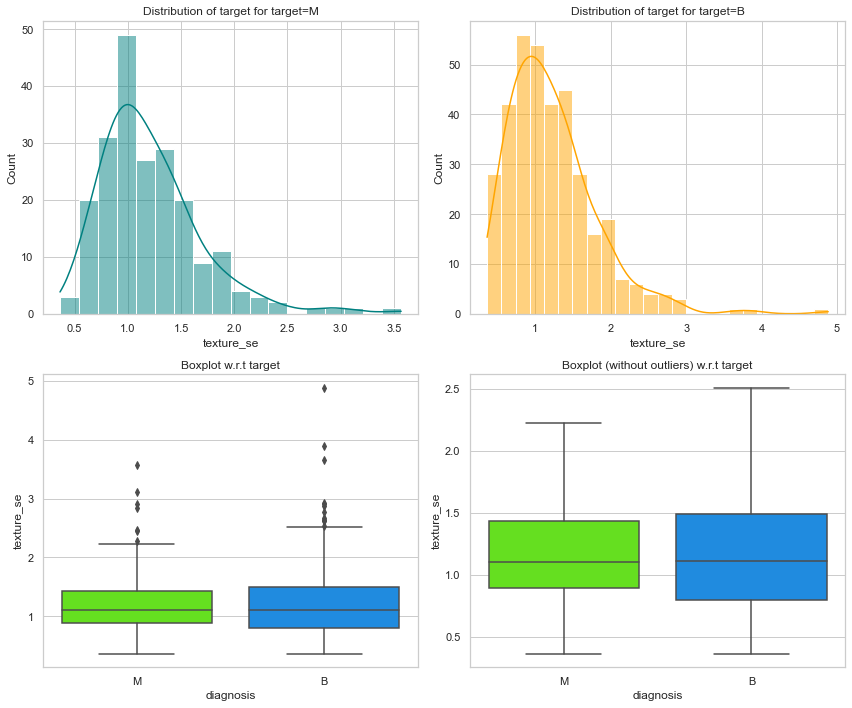

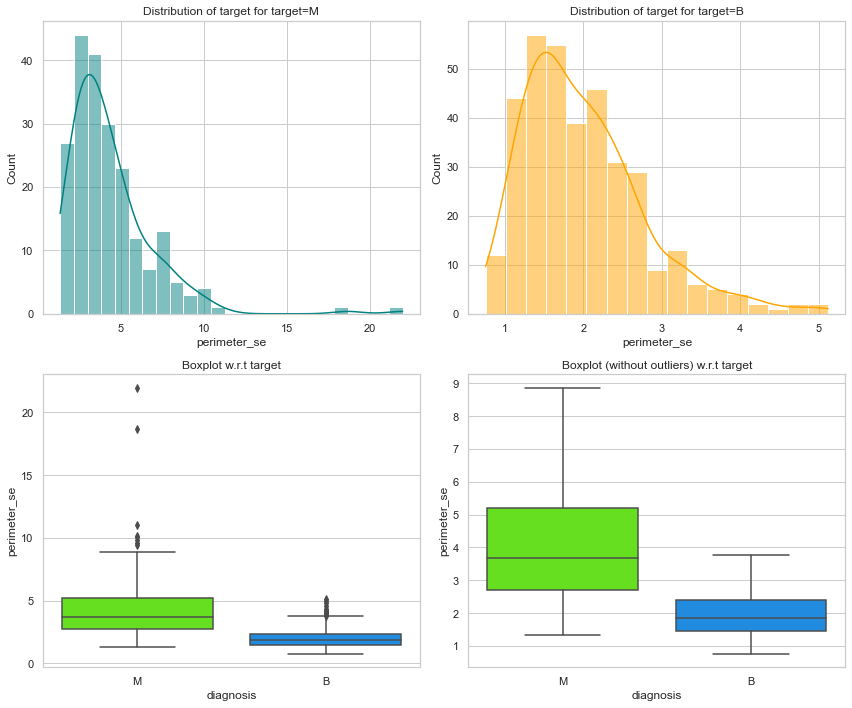

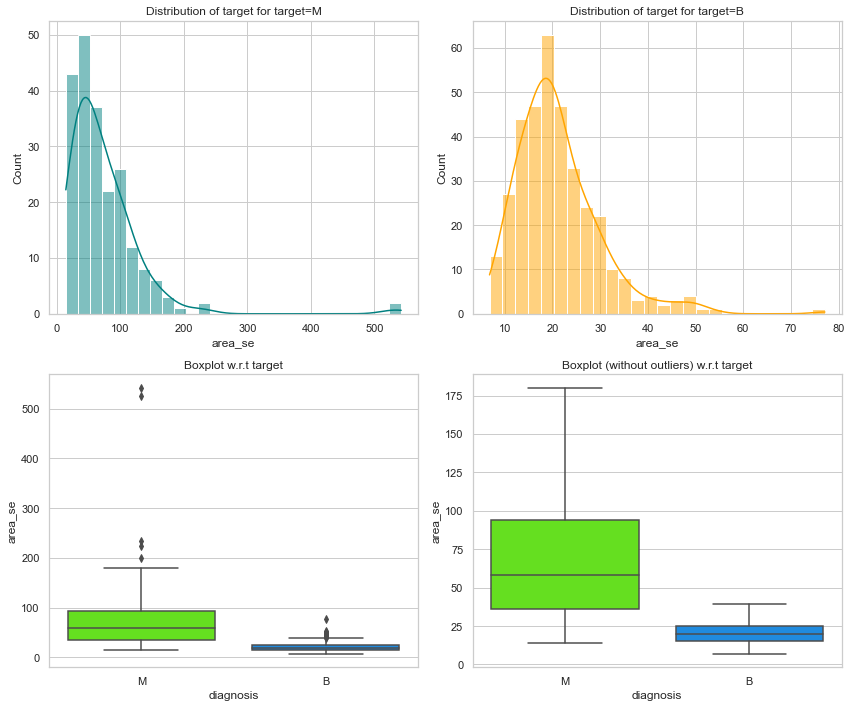

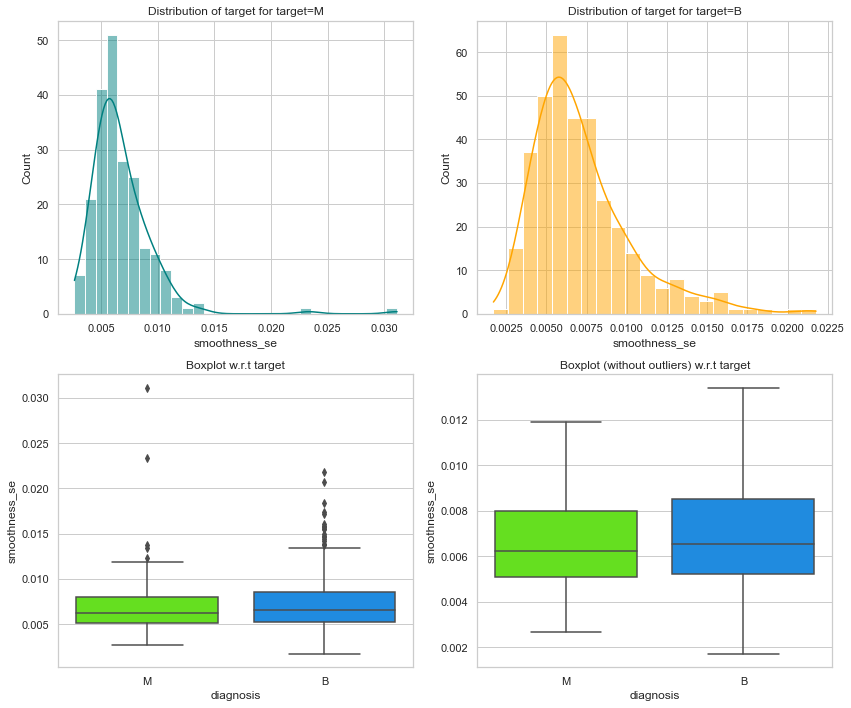

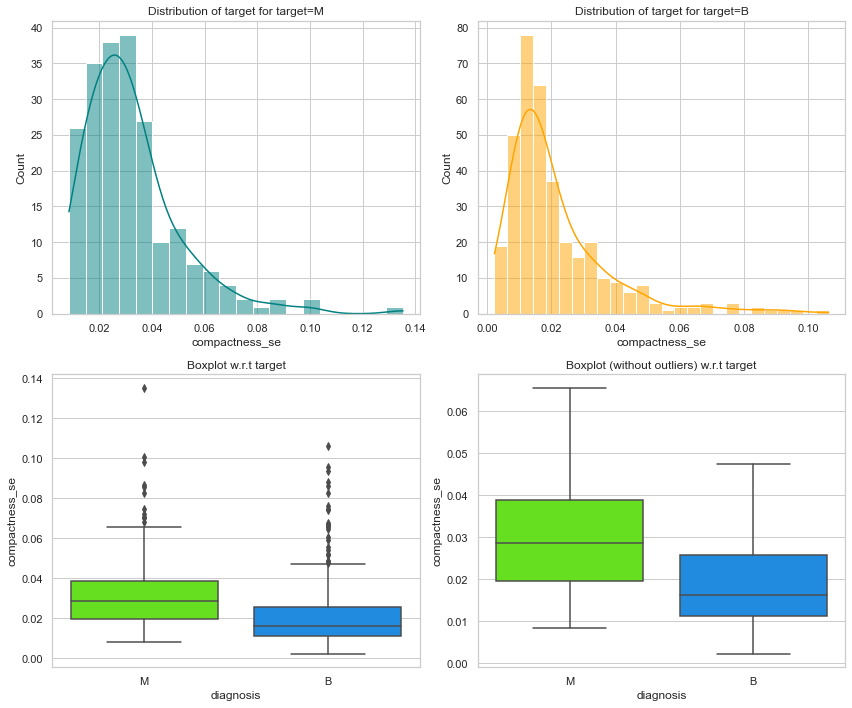

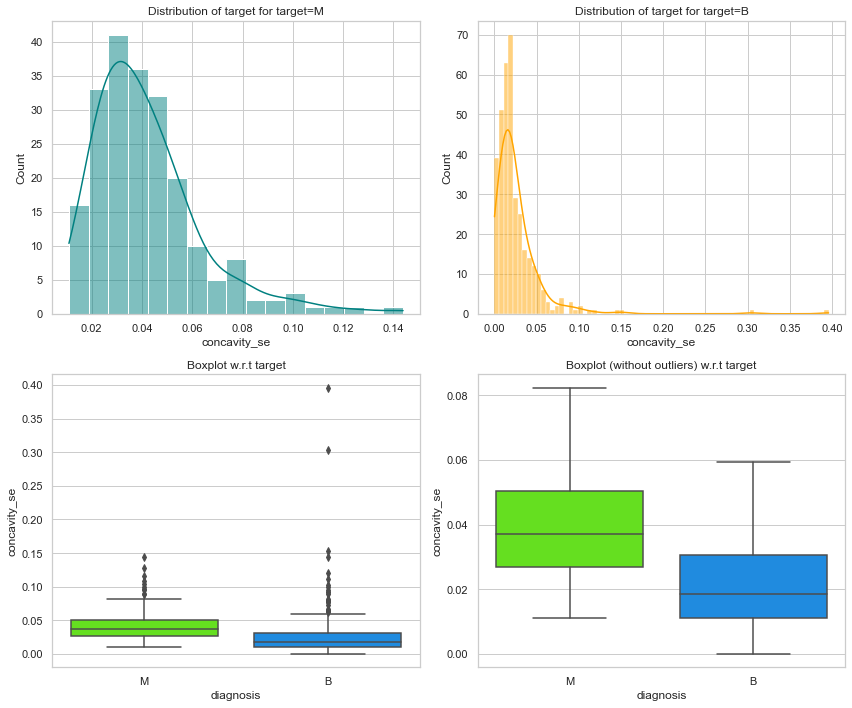

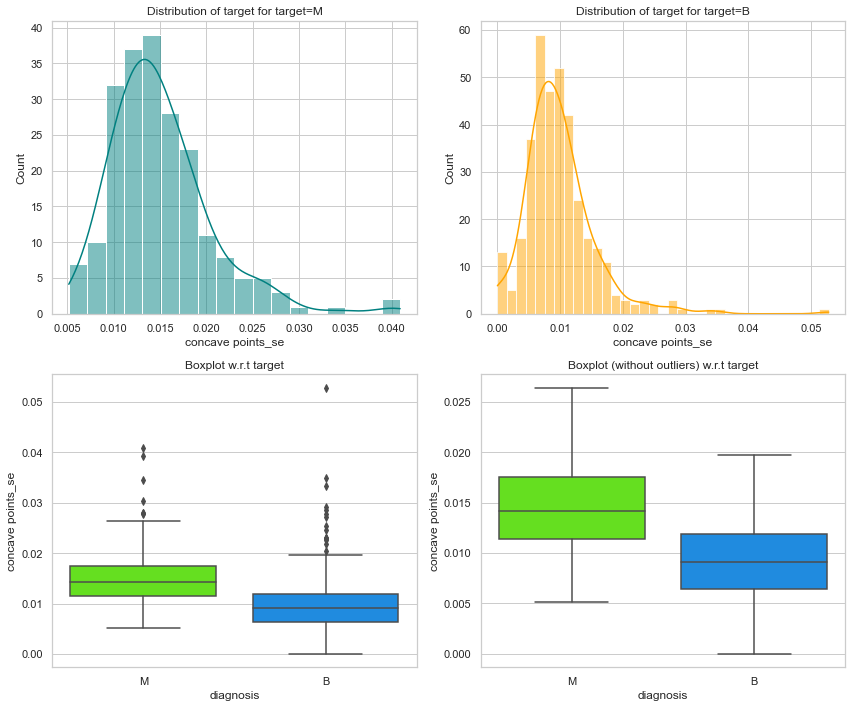

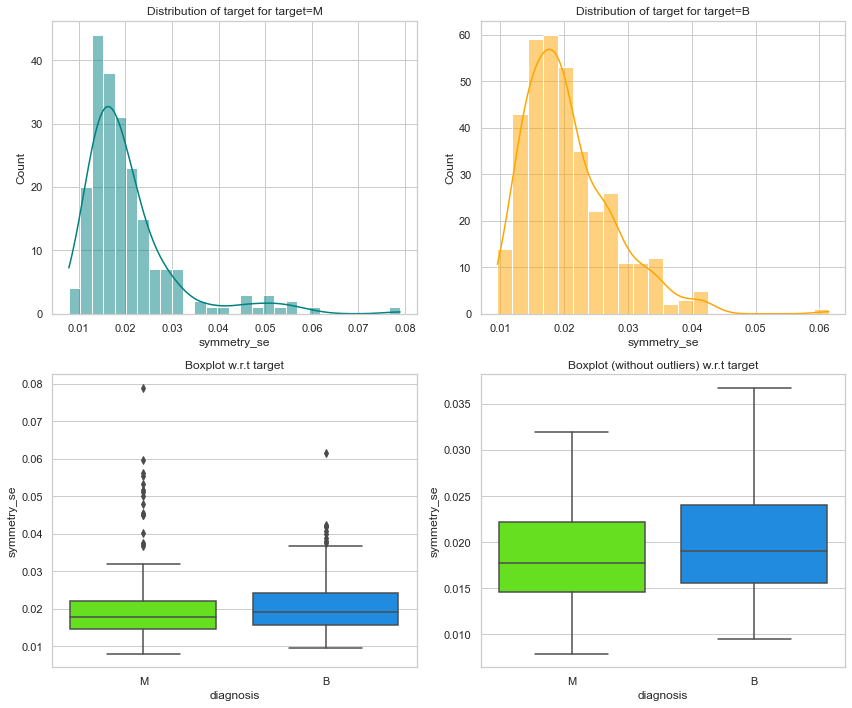

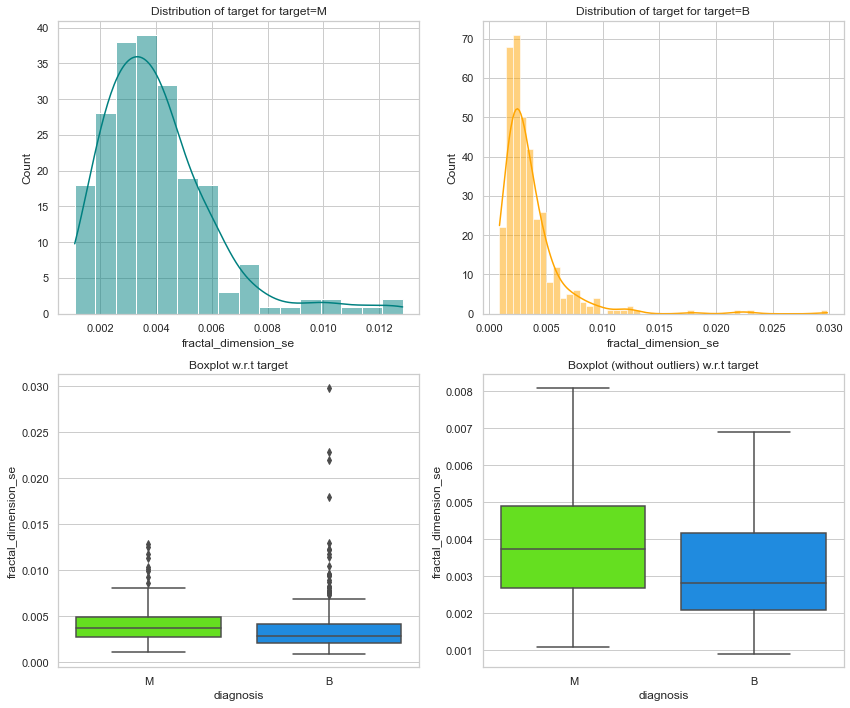

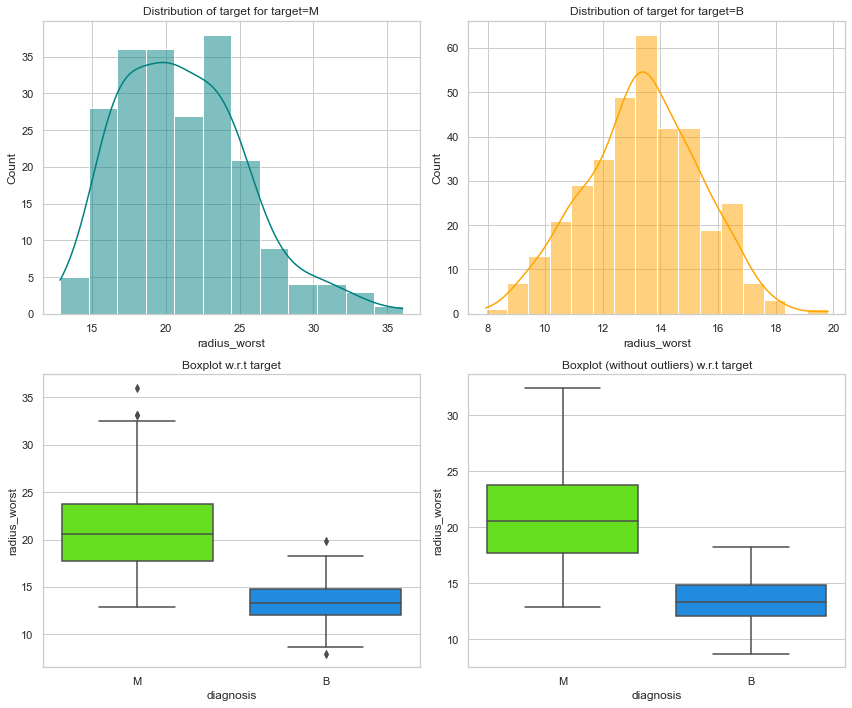

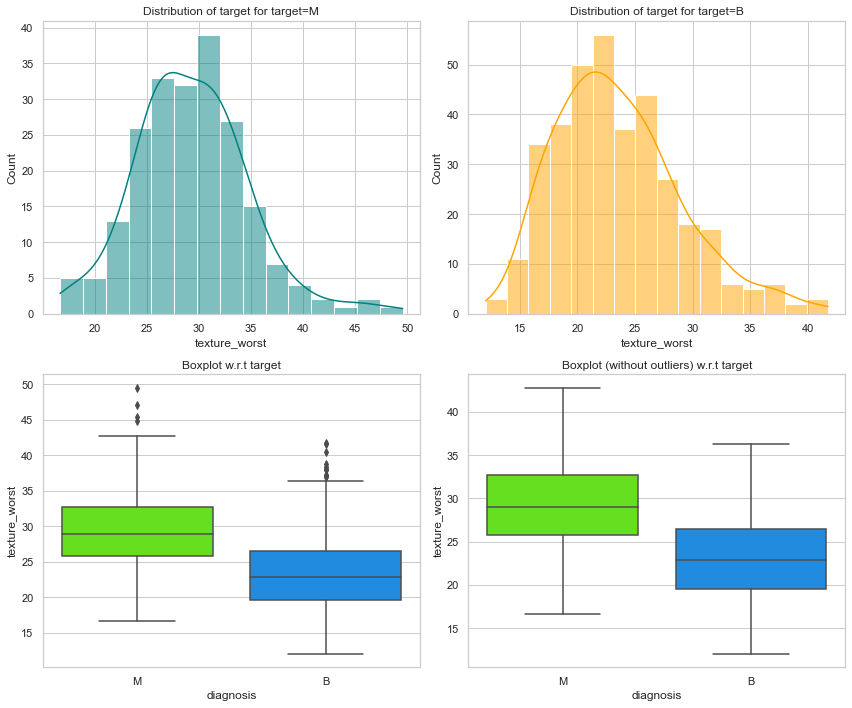

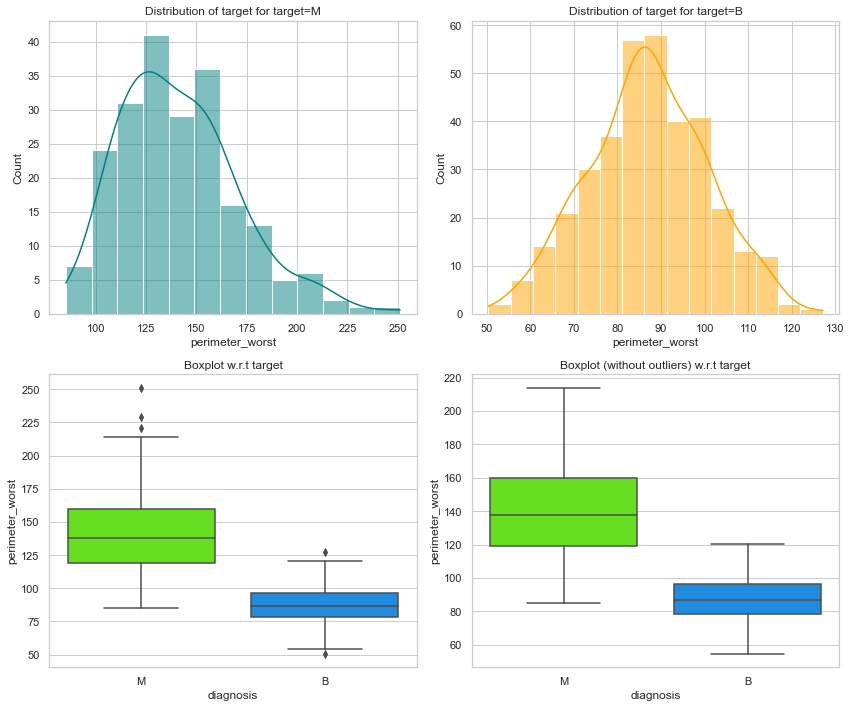

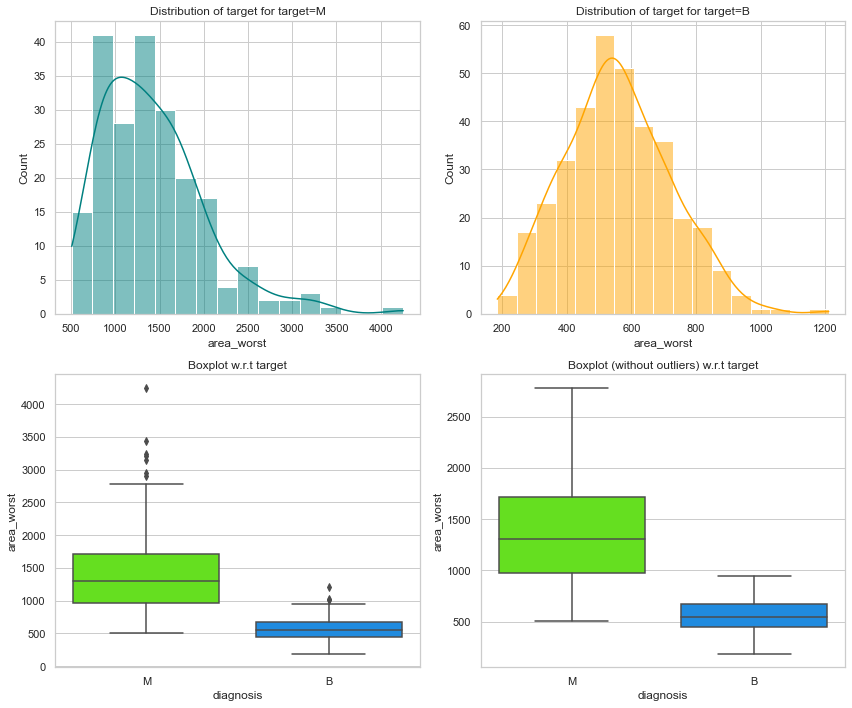

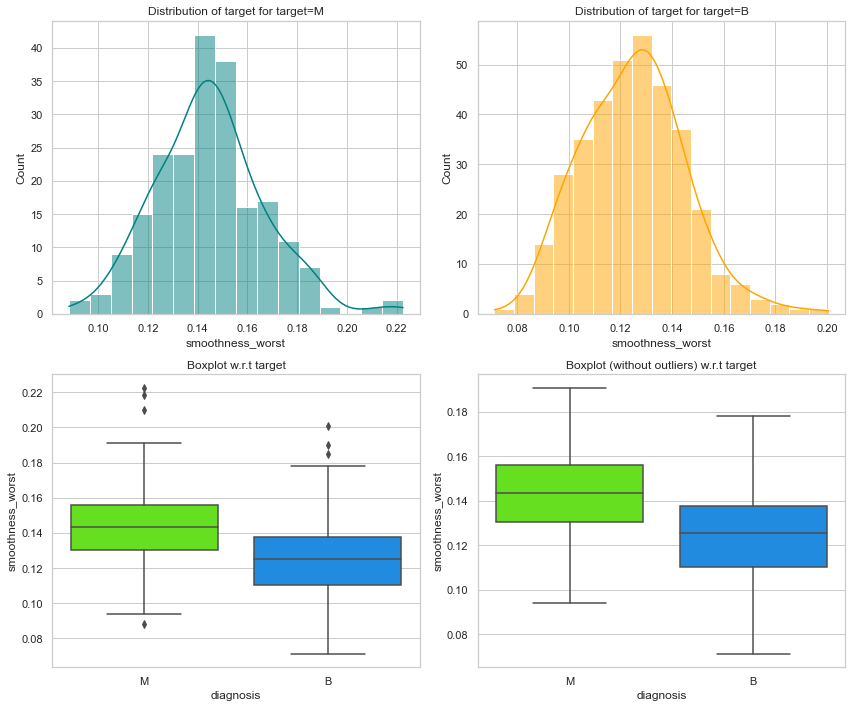

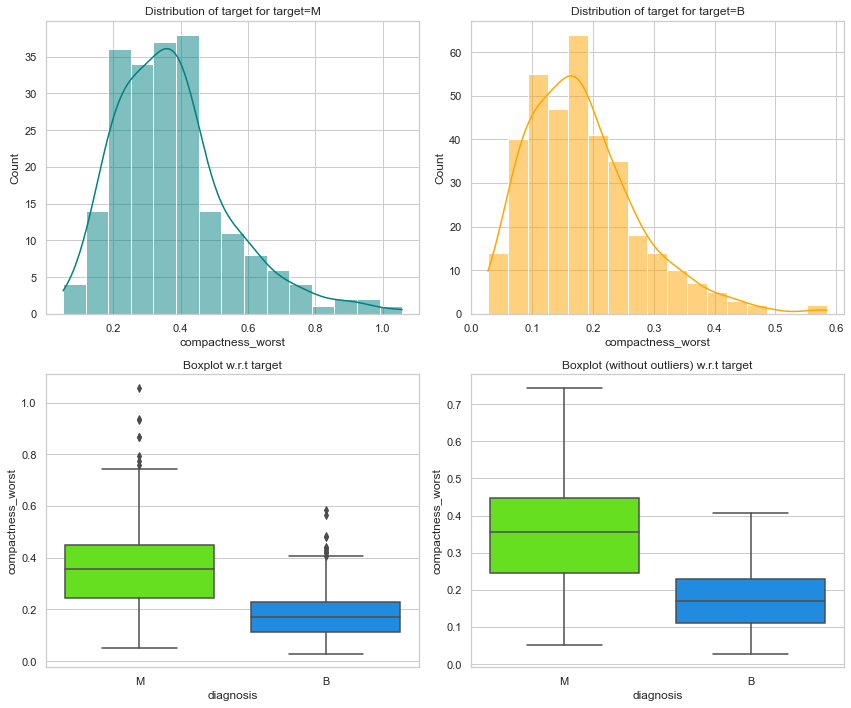

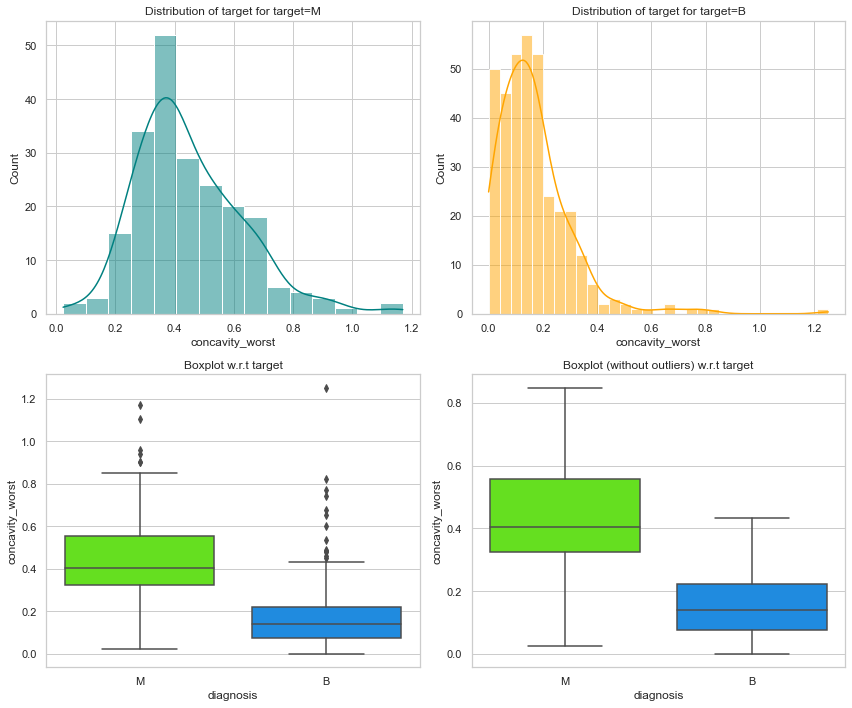

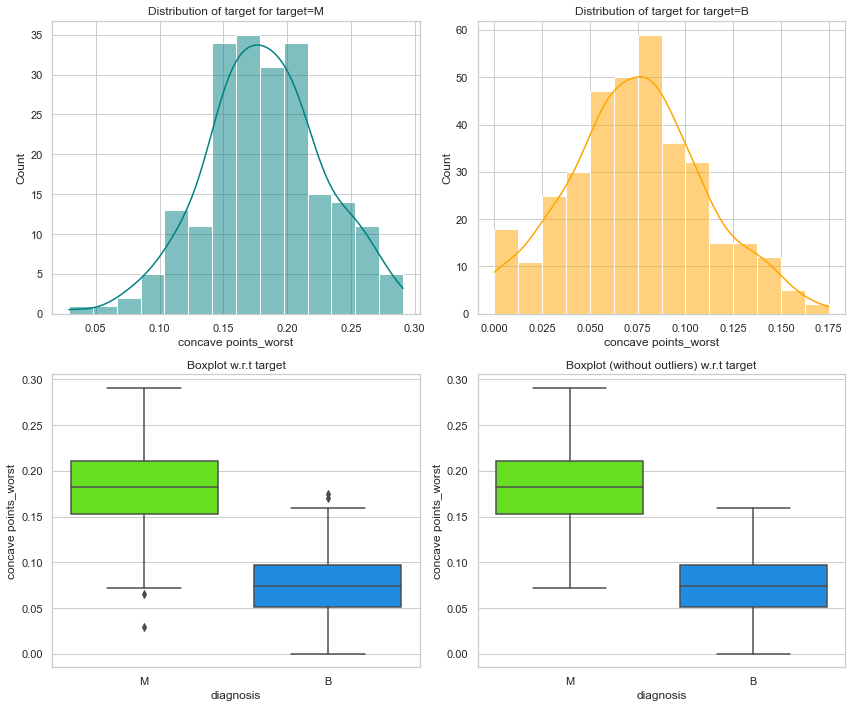

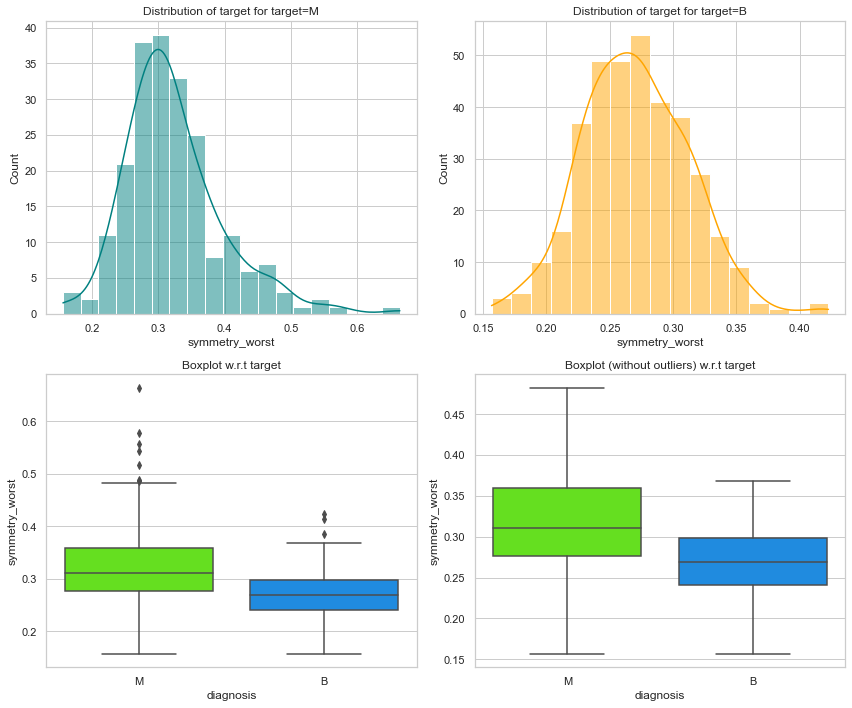

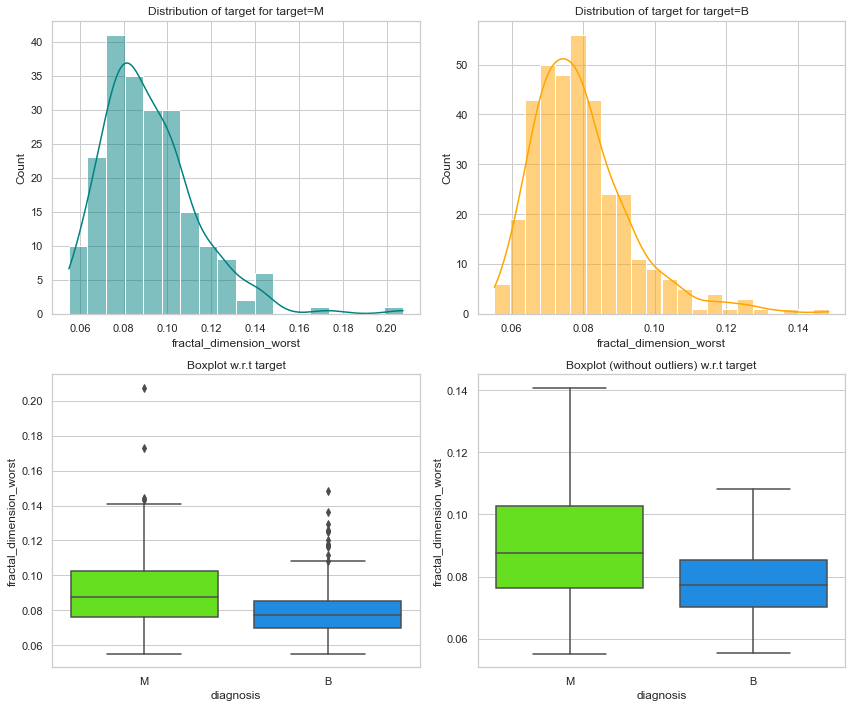

In [19]:
for column in df.columns:
    if column != 'diagnosis':
        distribution_plot_wrt_target(df, column, 'diagnosis')
        print(" ")

In [20]:
def process_correlation(data, target_column, correlation_threshold=0.2):
    """
    Keep columns with correlation > correlation_threshold with the target column

    data: dataframe
    target_column: the target column for correlation comparison
    correlation_threshold: threshold for correlation (default: 0.2)
    """
    # Filter out non-numeric columns
    #numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

    # Calculate correlation with the target column for numeric columns only
    corr = data.corr()
    corr_with_target = abs(corr[target_column])

    # Keep columns with correlation > correlation_threshold
    selected_columns = corr_with_target[corr_with_target>0.2]
    
    columns = [index for index, value in selected_columns.iteritems()]

    # Filter the dataframe to keep only selected columns
    data_filtered = data[columns]

    return data_filtered

In [21]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int) #encode the label into 1/0
df = process_correlation(df, 'diagnosis')
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
y = df['diagnosis']
X = df.drop(['diagnosis'], axis = 1)

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   radius_se                569 non-null    float64
 10  perimeter_se             569 non-null    float64
 11  area_se                  569 non-null    float64
 12  compactness_se           569 non-null    float64
 13  concavity_se             569 non-null    float64
 14  concave points_se        5

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [25]:
scaler = StandardScaler() #create an instance of standard scaler
scaler.fit(X_train) # fit it to the training data

scaler.transform(X_train) #transform training data
scaler.transform(X_test) #transform validation data

array([[-0.46649743, -0.13728933, -0.44421138, ..., -0.19435087,
         0.17275669,  0.20372995],
       [ 1.36536344,  0.49866473,  1.30551088, ...,  0.99177862,
        -0.561211  , -1.00838949],
       [ 0.38006578,  0.06921974,  0.40410139, ...,  0.57035018,
        -0.10783139, -0.20629287],
       ...,
       [-0.73547237, -0.99852603, -0.74138839, ..., -0.27741059,
        -0.3820785 , -0.32408328],
       [ 0.02898271,  2.0334026 ,  0.0274851 , ..., -0.49027026,
        -1.60905688, -0.33137507],
       [ 1.87216885,  2.80077153,  1.80354992, ...,  0.7925579 ,
        -0.05868885, -0.09467243]])

In [26]:
def plot_confusion_matrix(y_true, y_pred, classes, name):
    """
    Plot a confusion matrix.

    Parameters:
    - y_true: True labels
    - y_pred: Predicted labels
    - classes: Class names (list)
    """
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(f'Confusion Matrix of {name}')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

In [27]:
def train_evaluate_model(model, model_name,  X_train, y_train, X_test,y_test):
    '''
    Keyword arguments:
    X -- Training data
    y -- Traing labels

    returns a dataframe for evaluating metrics
    '''
    
    model.fit(X_train, y_train)  #fit the model instance 


    predictions = model.predict(X_test) # calculate predictions

    #compute metrics for evaluation
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)
    
    
    cm = confusion_matrix(y_test, predictions)
    plot_confusion_matrix(y_test, predictions,['Begnin' , 'Malignant'], model_name)

    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy'])
    print(eval_df)
    return eval_df

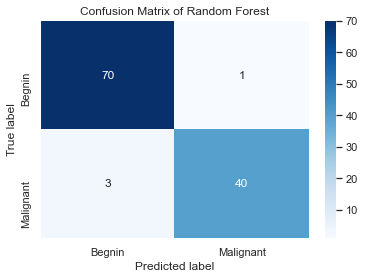

   accuracy  f1_score  precision    recall  balanced_accuracy
0  0.964912  0.952381    0.97561  0.930233           0.958074


In [28]:
rf_clf = RandomForestClassifier()
model_name = 'Random Forest'
results = train_evaluate_model(rf_clf, model_name, X_train, y_train, X_test, y_test)
results.index = [model_name]

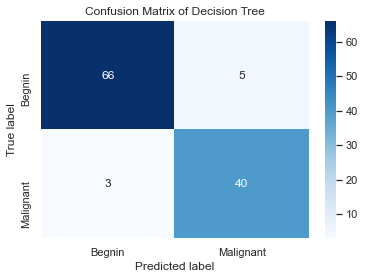

   accuracy  f1_score  precision    recall  balanced_accuracy
0  0.929825  0.909091   0.888889  0.930233           0.929905


In [29]:
dt_clf = DecisionTreeClassifier()
model_name = 'Decision Tree'
dt_result = train_evaluate_model(dt_clf, model_name, X_train, y_train, X_test, y_test)
dt_result.index = [model_name]
results = results.append(dt_result)

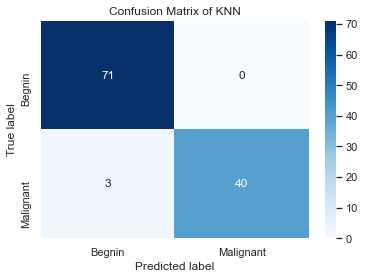

   accuracy  f1_score  precision    recall  balanced_accuracy
0  0.973684  0.963855        1.0  0.930233           0.965116


In [30]:
knn_clf = KNeighborsClassifier(n_neighbors=12)
model_name = 'KNN'
knn_result = train_evaluate_model(knn_clf, model_name, X_train, y_train, X_test, y_test)
knn_result.index = [model_name]
results = results.append(knn_result)

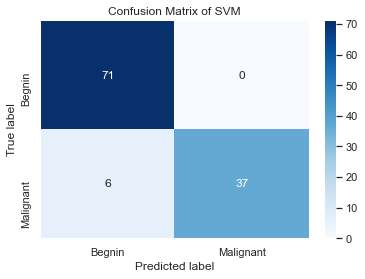

   accuracy  f1_score  precision    recall  balanced_accuracy
0  0.947368     0.925        1.0  0.860465           0.930233


In [31]:
svm_clf = SVC()
model_name = 'SVM'
svm_result = train_evaluate_model(svm_clf, model_name, X_train, y_train, X_test, y_test)
svm_result.index = [model_name]
results = results.append(svm_result)

In [32]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
KNN,0.973684,0.963855,1.000000,0.930233,0.965116
Random Forest,0.964912,0.952381,0.975610,0.930233,0.958074
SVM,0.947368,0.925000,1.000000,0.860465,0.930233
Decision Tree,0.929825,0.909091,0.888889,0.930233,0.929905
